In [1]:
%load_ext autoreload
%autoreload 2

import torch 
import pyro
import inspect

c:\Users\arik_\Documents\Dokumente\Job_Clausthal\PFNs\Repository\PFNExperiments\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from PFNExperiments.LinearRegression.GenerativeModels.GenerateData import GenerateData, check_data, check_and_plot_data
from PFNExperiments.LinearRegression.GenerativeModels.GenerateDataLM_Examples import make_lm_program_plain, make_lm_program_gamma_gamma, make_lm_program_gamma_gamma_augmented
from PFNExperiments.LinearRegression.GenerativeModels.LM_abstract import return_only_y, print_code

        def multivariate_lm_return_dict(x: torch.tensor, y: torch.tensor = None) -> dict:
                sigma_squared = (pyro.sample("sigma_squared", pyro.distributions.Gamma(a0, b0)) + 0.1)/10000
                
                tau = (pyro.sample("tau", pyro.distributions.Gamma(a1,b1)) + 0.1)/10

                beta_mean = torch.zeros(x.shape[1])
                beta_cov = (1/tau) * torch.eye(x.shape[1])

                beta = pyro.sample("beta", pyro.distributions.MultivariateNormal(beta_mean, beta_cov))

                mean = torch.matmul(x, beta)

                with pyro.plate("data", len(x)):
                        y = pyro.sample("obs", pyro.distributions.Normal(mean, sigma_squared), obs=y)

                return {
                        "x": x,
                        "y": y,
                        "sigma_squared": sigma_squared,
                        "tau": tau,
                        "beta": beta
                }



100%|██████████| 1000/1000 [00:00<00:00, 1197.34it/s]


Discarded 0 samples
{'X': {'mean': tensor(0.5000), 'variance': tensor(0.0834), 'min': tensor(1.2517e-06), 'max': tensor(1.0000)}, 'y': {'mean': tensor(-0.0198), 'variance': tensor(4.9086), 'min': tensor(-10.6805), 'max': tensor(16.0504)}, 'beta': {'mean': tensor([-0.0558,  0.0157,  0.0093]), 'variance': tensor([5.0303, 4.8770, 5.2195]), 'min': tensor([-7.8490, -8.0011, -8.7611]), 'max': tensor([12.0784,  9.9393, 11.0783])}}
Statistics for sigma_squared:
Mean: 0.00026647280901670456
Variance: 1.2801398163730937e-08
Min: 5.852946196682751e-05
Max: 0.0007402894552797079


Statistics for tau:
Mean: 0.2537151575088501
Variance: 0.011893571354448795
Min: 0.0456341877579689
Max: 0.6996963024139404




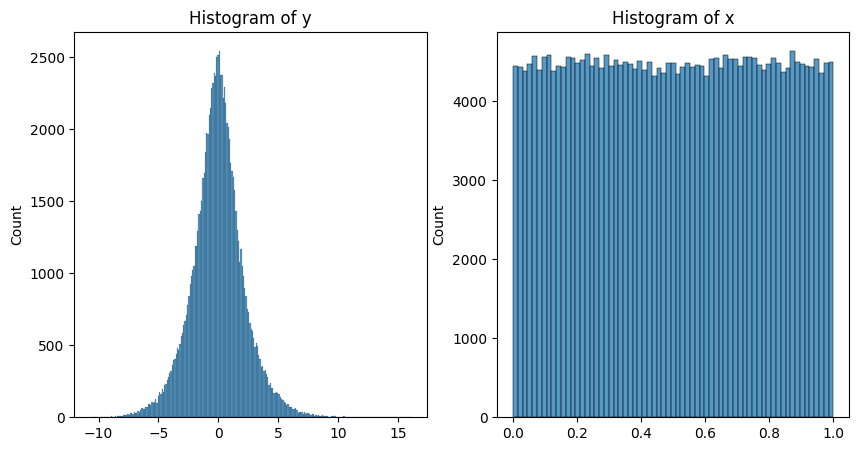

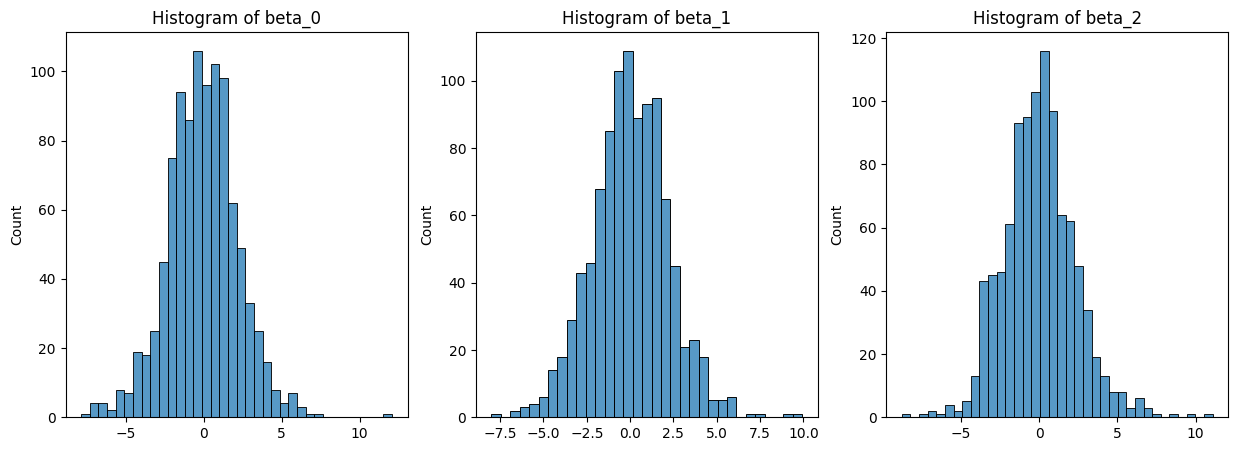

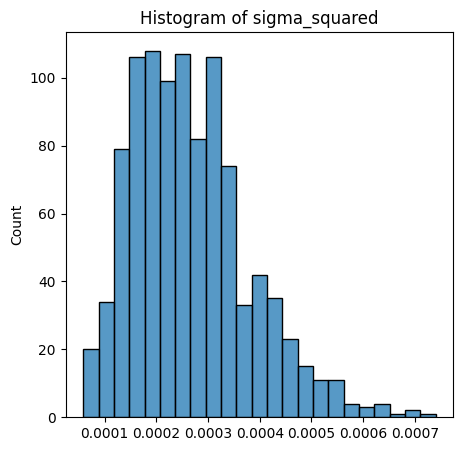

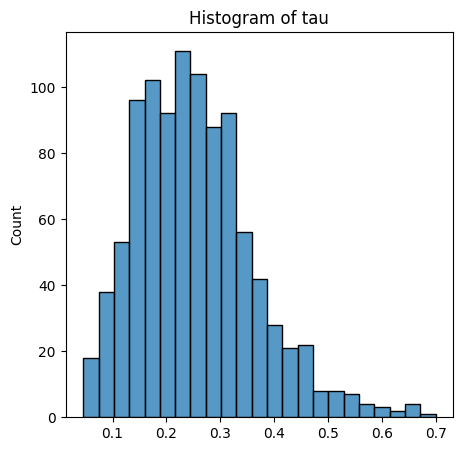

In [5]:
x_test = torch.rand(10, 5)
pprogram1 = make_lm_program_gamma_gamma_augmented()
pprogram1_y = return_only_y(pprogram1)
pprogram1
print_code(pprogram1)
generator = GenerateData(pprogram1)
generator.render_model()
_ = generator.check_model()
loader = generator.make_dataloaders_dynamic()

In [6]:
train_loader, val_loader, test_loader = loader

In [8]:
batch = next(iter(train_loader))
x = batch['x']
y = batch['y']
beta = batch['beta']

In [12]:
print(x.shape)

torch.Size([256, 100, 5])


In [10]:
X_y = torch.cat([x, y.unsqueeze(-1)], dim = -1)

In [21]:
from PFNExperiments.LinearRegression.Models.Transformer import Transformer, batc

In [22]:
model = Transformer(
    n_features=6,
    seq_len=100
)

In [23]:
out = model(X_y)

torch.Size([256, 2, 5])